In [1]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wavelength_nm = 800  # [nm]
STOP = 40
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0



print(dipoles.initial_field(wavelength_nm, angle, 1, eps_Au, point, phase, a))


p, m =  dipoles.calc_dipoles_v2(wavelength_nm, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
print(np.round(p,39))

print(np.round(m,34))

# p2,m2 = dipoles.calc_dipoles(wavelength_nm, eps_Au, 40, R, eps_Si, point, angle, amplitude=1, phase=phase, a=a)

# print(np.round(p2,39))

# print(np.round(m2,34))


wl = np.linspace(600, 1200, 60)

Px=[]
Py=[]
Pz=[]
Mx=[]
My=[]
Mz=[]

# res = np.empty((3,len(wl)))
for i in tqdm(range(len(wl))):

    p,m =  dipoles.calc_dipoles_v2(wl[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    Px.append(p[0])
    Py.append(p[1])
    Pz.append(p[2])
    Mx.append(m[0])
    My.append(m[1])
    Mz.append(m[2])

  

(array([[0.39240614-1.73135096j],
       [0.        +0.j        ],
       [0.13773195+0.02531449j]]), array([[ 0.        +0.j      ],
       [-0.00086508-0.000159j],
       [ 0.        +0.j      ]]))
[[ 2.00082283e-31+2.90870982e-31j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.34214360e-32+2.58207550e-32j]]
[[ 0.00000000e+00+0.00000000e+00j]
 [-5.18961782e-24-2.06946777e-23j]
 [ 0.00000000e+00+0.00000000e+00j]]


  5%|▌         | 3/60 [00:02<00:52,  1.08it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:444: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 48%|████▊     | 29/60 [00:29<00:33,  1.08s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [01:03<00:00,  1.06s/it]


In [16]:
import dipoles

alpha_e, aplha_h = dipoles.alpha_v2(800, 80, eps_Si)

alpha_e2, alpha_h2 = dipoles.get_alpha(80, eps_Si, 800)
print(alpha_e, alpha_e2)
print(aplha_h, alpha_h2)

(6.1023802877074116e-21+9.877096479669483e-22j) (4.5135448094540186e-32+6.047584929074367e-33j)
(2.166947325715558e-21+1.3637885343547598e-22j) (1.0578547833093139e-21+3.215309706930123e-23j)


In [36]:
wls = np.linspace(600,1200,100)
import dipoles
R = 80

alpha_v2 = []
eps_Si = frenel.get_interpolate('Si')
alpha_v1=[]

for wl in wls:
    alpha_v2.append(dipoles.alpha_v2(wl, R, eps_Si))
    alpha_v1.append(dipoles.get_alpha(R, eps_Si, wl))
alpha_v2 = np.array(alpha_v2)
alpha_v1 = np.array(alpha_v1)

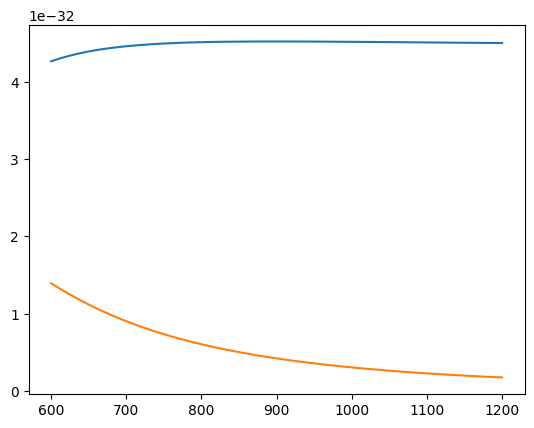

In [38]:
# plt.plot(wls, np.real(alpha_v2)[:,0])
# plt.plot(wls, np.imag(alpha_v2)[:,0])
plt.plot(wls, np.real(alpha_v1)[:,0])
plt.plot(wls, np.imag(alpha_v1)[:,0])

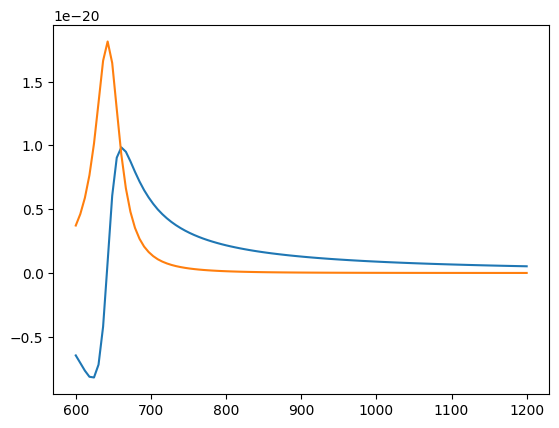

In [35]:
plt.plot(wls, np.real(alpha_v2)[:,1])
plt.plot(wls, np.imag(alpha_v2)[:,1])

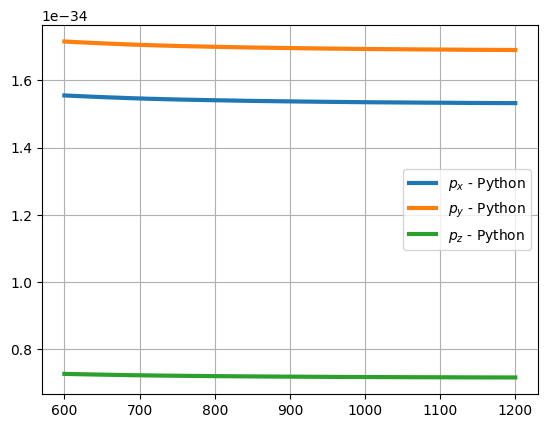

In [15]:
plt.plot(wl, np.real(Px), label='$p_x$ - Python', lw=3)  
plt.plot(wl, np.real(Py), label='$p_y$ - Python', lw=3)  
plt.plot(wl, np.real(Pz), label ='$p_z$ - Python', lw=3)  
plt.grid()

plt.legend()

In [2]:
dipoles = np.loadtxt('comsol\\p sub 146 TM.txt', skiprows=8, delimiter=',')

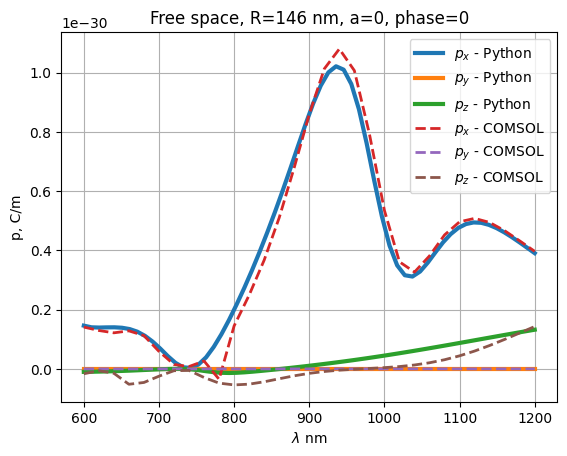

In [7]:
plt.plot(wl, np.real(Px), label='$p_x$ - Python', lw=3)  
plt.plot(wl, np.real(Py), label='$p_y$ - Python', lw=3)  
plt.plot(wl, np.real(Pz), label ='$p_z$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,1], label='$p_x$ - COMSOL', linestyle='dashed', lw=2)  
plt.plot(dipoles[:,0], dipoles[:,2], label='$p_y$ - COMSOL', linestyle='dashed', lw=2)  
plt.plot(dipoles[:,0], dipoles[:,3], label='$p_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()

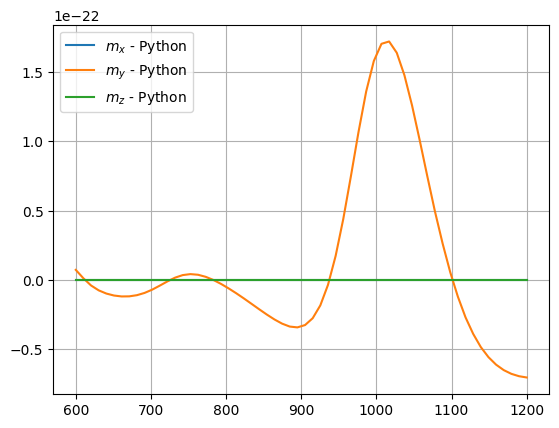

In [4]:
plt.plot(wl, np.real(Mx), label='$m_x$ - Python')  
plt.plot(wl, np.real(My), label='$m_y$ - Python')  
plt.plot(wl, np.real(Mz), label='$m_z$ - Python')  
plt.grid()

plt.legend()

In [5]:
mdipoles = np.loadtxt('comsol\\m sub 146 TM.txt', skiprows=8, delimiter=',')

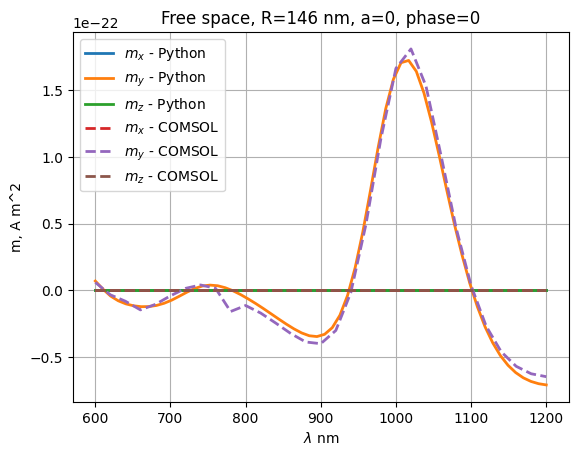

In [9]:
plt.plot(wl, np.real(Mx), label='$m_x$ - Python', lw=2)  
plt.plot(wl, np.real(My), label='$m_y$ - Python', lw=2)  
plt.plot(wl, np.real(Mz), label='$m_z$ - Python', lw=2)  
plt.plot(mdipoles[:,0], mdipoles[:,1], label='$m_x$ - COMSOL', linestyle='dashed', lw=2)  
plt.plot(mdipoles[:,0], mdipoles[:,2], label='$m_y$ - COMSOL', linestyle='dashed', lw=2)  
plt.plot(mdipoles[:,0], mdipoles[:,3], label='$m_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()

In [19]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wavelength_nm = 800  # [nm]
STOP = 10
R = 14
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5



print(dipoles.initial_field(wavelength_nm, angle, 1, eps_Au, point, phase, a))


p, m = dipoles.calc_dipoles_v2(wavelength_nm, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )

print(np.round(p,37))

print(np.round(m,32))

# wl = np.linspace(600, 1200, 50)

# Px=[]
# Py=[]
# Pz=[]
# Mx=[]
# My=[]
# Mz=[]

# # res = np.empty((3,len(wl)))
# for i in tqdm(range(len(wl))):

#     p,m = dipoles.calc_dipoles(wl[i], eps_Au, STOP, R , eps_Si, point , angle, amplitude=1, phase=phase, a=a)
#     Px.append(p[0])
#     Py.append(p[1])
#     Pz.append(p[2])
#     Mx.append(m[0])
#     My.append(m[1])
#     Mz.append(m[2])

  

(array([[0.13275125-0.55383762j],
       [0.11152764-0.56756886j],
       [0.51835142+0.11502019j]]), array([[ 0.00303475+0.00055004j],
       [-0.00325571-0.00072243j],
       [ 0.00012511-0.0006367j ]]))
[[3.320e-35-1.381e-34j]
 [2.790e-35-1.415e-34j]
 [1.305e-34+2.930e-35j]]
[[ 5.3393e-28+9.8550e-29j]
 [-5.7273e-28-1.2903e-28j]
 [ 2.2390e-29-1.1202e-28j]]
